In [1]:
# Hypothesis:
#
# Using a music genre dataset, we can build a model that accurately classifies future songs into specific genres based 
# on their musical characteristics such as tempo, rhythm, harmony, melody, and instrumentation.

# Explanation:
#
# By analyzing the musical features of songs that belong to different genres, we can identify patterns and relationships
# between these features and the genre they belong to. We can then use these patterns to build a model that can predict
# the genre of future songs based on their musical characteristics. This model can help the music industry categorize
# new songs and make informed decisions about how to market them to specific audiences.

# Method:
#
# Complete a data analysis using the following:
# 
# Identify Data Source & Clean (as-needed)
# Descriptive Analysis
# Exploratory Analysis
# Predictive Analysis - Supervised Training
# - split data into 2 subsets(a => 90% of data, b => remaining 10%)
# - train model on set a
# - verify model accuracy - classify based on set b attributes, compare to b actual genre
#
# Production Deployment:
# - Deploy model behind an API using Kubernetes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Identify Data Source & Clean (as-needed)
#
# music genre data from kaggle - https://www.kaggle.com/datasets/purumalgi/music-genre-classification
# accessed on 2/3/23
df = pd.read_csv('./music_genre.csv', usecols=lambda c: c not in ['instance_id'])
df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [4]:
# Descriptive Analysis - Begin

# Central tendency measures:
#
# Mean: The average of the data
# Median: The middle value of the data
# Mode: The most frequently occurring value in the data

# Dispersion measures:
#
# Range: The difference between the largest and smallest values in the data
# Variance: The average of the squared differences from the mean
# Standard deviation: The square root of the variance, which measures the spread of the data
# Interquartile range (IQR): The difference between the third and first quartiles, which measures the spread of the middle 50% of the data

# Shape of the distribution:
#
# Skewness: A measure of the asymmetry of the distribution, indicating whether it is skewed to the left or right
# Kurtosis: A measure of the peakedness of the distribution, indicating whether it is more or less peaked than a normal distribution

# Visualizations:
# 
# Histograms: A bar graph that shows the frequency of the data within a given range of values
# Box plots: A graph that displays the median, quartiles, and outliers of the data
# Density plots: A smoothed version of the histogram that shows the distribution of the data
# Scatter plots: A graph that shows the relationship between two variables by plotting points for each data point

In [5]:
# view entire descriptive summary of data set
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [6]:
# zoom-in on popularity column with a data frame subset
df_subset = df[['popularity']]
df_subset

,popularity
0,27.0
1,31.0
2,28.0
3,34.0
4,32.0
...,...
50000,59.0
50001,72.0
50002,51.0
50003,65.0


In [7]:
# get descriptive analysis for just this popularity column
df_subset.describe()

,popularity
count,50000.000000
mean,44.220420
std,15.542008
min,0.000000
25%,34.000000
50%,45.000000
75%,56.000000
max,99.000000


In [8]:
# most popular song - 99.0 is highest
column_name = "popularity"
index_of_max_value = df[column_name].idxmax()
row_with_highest_value = df.loc[index_of_max_value]
row_with_highest_value

artist_name         Post Malone
track_name                 Wow.
popularity                 99.0
acousticness              0.163
danceability              0.833
duration_ms            149520.0
energy                    0.539
instrumentalness       0.000002
key                           B
liveness                  0.101
loudness                 -7.399
mode                      Minor
speechiness               0.178
tempo                    99.947
obtained_date             4-Apr
valence                   0.385
music_genre                 Rap
Name: 26239, dtype: object

In [9]:
# least popular song
column_name = "popularity"
index_of_min_value = df[column_name].min()
row_with_min_value = df.loc[index_of_min_value]
row_with_min_value

artist_name                     Röyksopp
track_name          Röyksopp's Night Out
popularity                          27.0
acousticness                     0.00468
danceability                       0.652
duration_ms                         -1.0
energy                             0.941
instrumentalness                   0.792
key                                   A#
liveness                           0.115
loudness                          -5.201
mode                               Minor
speechiness                       0.0748
tempo                            100.889
obtained_date                      4-Apr
valence                            0.759
music_genre                   Electronic
Name: 0, dtype: object

In [10]:
# remove count row - skews hist visualization
df_stat = df_subset.describe().drop('count', axis=0)
df_stat

,popularity
mean,44.220420
std,15.542008
min,0.000000
25%,34.000000
50%,45.000000
75%,56.000000
max,99.000000


In [11]:
# data with popularity btwn 60.0 and 80.0
df[(df['popularity'] >= 60.0) & (df['popularity'] <= 80.0)]

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
34,Massive Attack,Paradise Circus,63.0,0.41400,0.810,297775.0,0.591,0.799000,G#,0.0720,-13.385,Major,0.0638,136.028,4-Apr,0.297,Electronic
99,LCD Soundsystem,Dance Yrself Clean,63.0,0.00557,0.739,536471.0,0.611,0.725000,B,0.0400,-9.829,Major,0.0622,?,4-Apr,0.794,Electronic
140,LCD Soundsystem,All My Friends,61.0,0.14800,0.701,462267.0,0.788,0.625000,D,0.0977,-5.611,Major,0.0425,142.584,4-Apr,0.795,Electronic
169,Kasabian,Fire,66.0,0.08740,0.525,252280.0,0.741,0.147000,A#,0.1170,-5.643,Major,0.0311,117.031,4-Apr,0.179,Electronic
180,Daft Punk,Harder Better Faster Stronger,70.0,0.04270,0.817,224693.0,0.716,0.002630,F#,0.3580,-8.898,Minor,0.1440,123.475,4-Apr,0.692,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,empty_field,Drogba (Joanna) - WizKid Remix,62.0,0.01060,0.944,197923.0,0.559,0.000033,B,0.0775,-7.706,Minor,0.0640,107.992,4-Apr,0.705,Hip-Hop
49997,Tee Grizzley,First Day Out,75.0,0.17100,0.587,254694.0,0.711,0.000000,C#,0.1250,-6.330,Major,0.4200,98.008,4-Apr,0.381,Hip-Hop
50001,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.1090,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50003,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.1060,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [12]:
column = 'popularity'
value_counts = df[column].value_counts()
value_counts

52.0    1316
54.0    1295
53.0    1286
50.0    1265
55.0    1250
        ... 
95.0       2
97.0       1
99.0       1
94.0       1
92.0       1
Name: popularity, Length: 99, dtype: int64

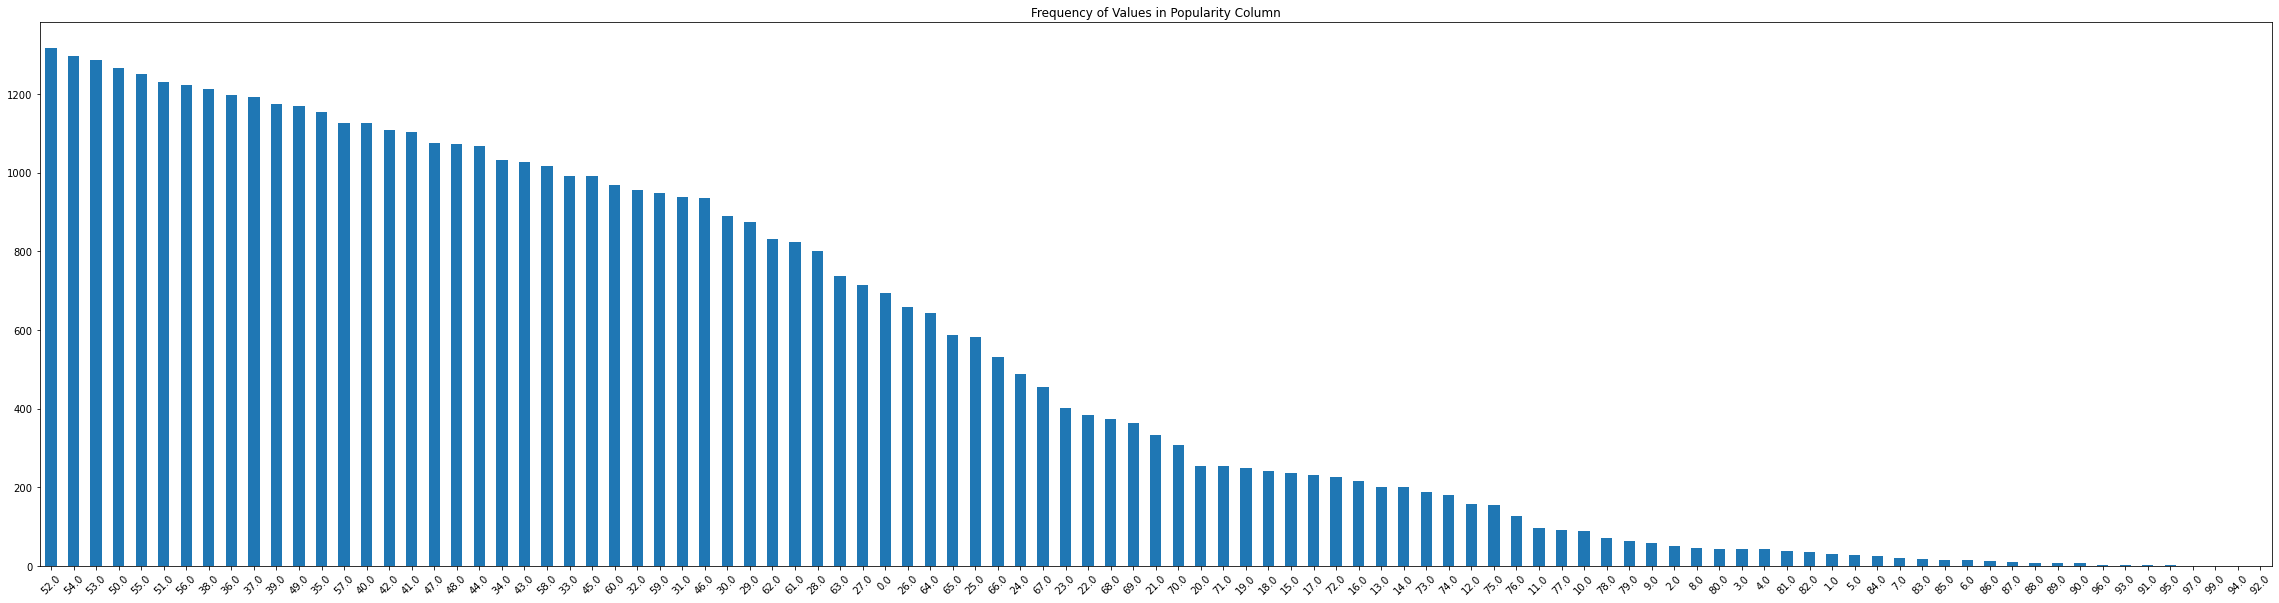

In [13]:
# Use value_counts on the column you want to plot frequency for
counts = df['popularity'].value_counts()

fig, ax = plt.subplots(figsize=(40, 10))


# Plot the frequency using a bar plot
counts.plot(kind='bar', ax=ax)

# Add a title to the plot
plt.title("Frequency of Values in Popularity Column")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [14]:
# verify have only 1 song with popularity of 92.0
df[df['popularity'] == 92.0].shape[0] == 1

True

In [15]:
# get song with popularity of 92.0
df[df["popularity"] == 92.0]

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
48850,XXXTENTACION,SAD!,92.0,0.258,0.74,166606.0,0.613,0.00372,G#,0.123,-4.88,Major,0.145,75.023,4-Apr,0.473,Hip-Hop


In [16]:
# verify num songs with popularity 52.0 is 1316
len(df[df["popularity"] == 52.0]) == 1316

True

In [21]:
df[ ['popularity'] ]

,popularity
0,27.0
1,31.0
2,28.0
3,34.0
4,32.0
...,...
50000,59.0
50001,72.0
50002,51.0
50003,65.0


In [30]:
# Get variance
# High variance values indicate that the values in a particular variable are spread out and far from the mean.
# Low variance  values indicate that the values are clustered close to the mean.
df.var(numeric_only=True)
variance_df = pd.DataFrame({
    'mean': df.mean(numeric_only=True),
    'median': df.median(numeric_only=True),
    'variance': df.var(numeric_only=True)
    
})
variance_df

,mean,median,variance
popularity,44.220420,45.000000,2.415540e+02
acousticness,0.306383,0.144000,1.165130e-01
danceability,0.558241,0.568000,3.190937e-02
duration_ms,221252.602860,219281.000000,1.655647e+10
energy,0.599755,0.643000,6.999161e-02
instrumentalness,0.181601,0.000158,1.058911e-01
liveness,0.193896,0.126000,2.612654e-02
loudness,-9.133761,-7.276500,3.798244e+01
speechiness,0.093586,0.048900,1.027652e-02
valence,0.456264,0.448000,6.106767e-02
